In [10]:
import utils
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

current_folder = Path("")
images_folder = current_folder / "dataset" / "images"
models_folder = current_folder / "models"
latest_image_path = utils.get_latest_file_path(images_folder)

model = utils.get_model(models_folder, -1)  # -1 -- latest

for layer in model.layers:
    layer.trainable = False

image = cv2.imread(str(latest_image_path))
image = utils.preprocess_images(image)
# Reshape image to have 4 dimensions
image_rs = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

--------------------------------------------------
Model used: model1.h5
--------------------------------------------------


In [11]:
#left, straight, right = model.predict(image_rs)[0] # without compile should be faster (load_weights)
#left, straight, right = np.array(model(image_rs, training=False))[0]

angle = np.array(model(image_rs, training=False))[0]
print(angle)

[1.0653804e-06 9.9998999e-01 8.8878833e-06]


In [12]:
def explain_image(image_id):
    image_path = images_folder / f"image_{image_id}.png"

    image = cv2.imread(str(image_path))
    image = utils.preprocess_images(image)

    from lime import lime_image

    explainer = lime_image.LimeImageExplainer()

    # Note: if top_labels grater than 1, the positive area increases
    explanation = explainer.explain_instance(image.astype("double"), model,
                                             top_labels=1, hide_color=0, num_samples=1000)

    image_rs = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    output = np.array(model(image_rs, training=False))[0]
    if len(output) == 1:
        print(f"Angle {float(angle):.2f}")
    else:
        print(output)

    from skimage.segmentation import mark_boundaries

    temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
    temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
    ax1.imshow(mark_boundaries(temp_1, mask_1))
    ax2.imshow(mark_boundaries(temp_2, mask_2))
    ax1.axis("off")
    ax2.axis("off")
    plt.show()
    # Left image: pixels used for classification (super-pixels)
    # Right image: green icrease the probability of beign of the true class, the ones colored in red decrease the proability

100%|██████████| 1000/1000 [00:00<00:00, 1010.50it/s]


[9.999099e-01 8.991935e-05 2.089616e-07]


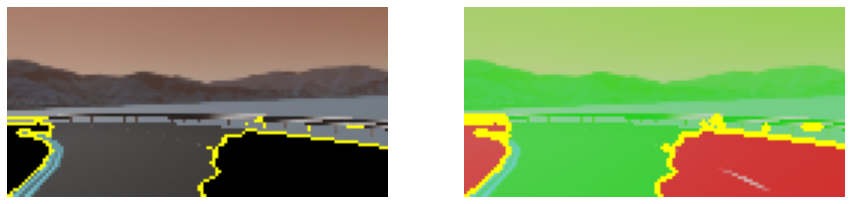

In [19]:
image_id = 1500

explain_image(image_id)

100%|██████████| 1000/1000 [00:00<00:00, 1063.18it/s]


[9.9887401e-01 1.1252437e-03 7.2290413e-07]


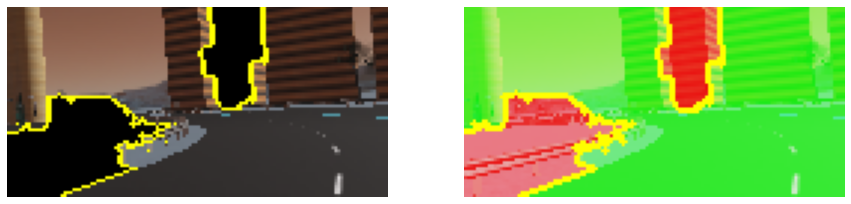

In [14]:
explain_image(2500)

100%|██████████| 1000/1000 [00:00<00:00, 1040.70it/s]


[8.5422627e-11 3.3866438e-06 9.9999666e-01]


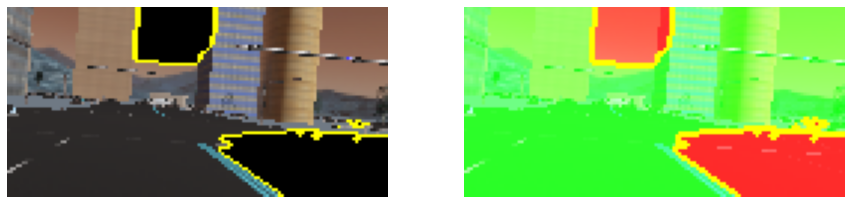

In [15]:
explain_image(3000)

100%|██████████| 1000/1000 [00:01<00:00, 984.09it/s]


[0.95362914 0.04419363 0.00217722]


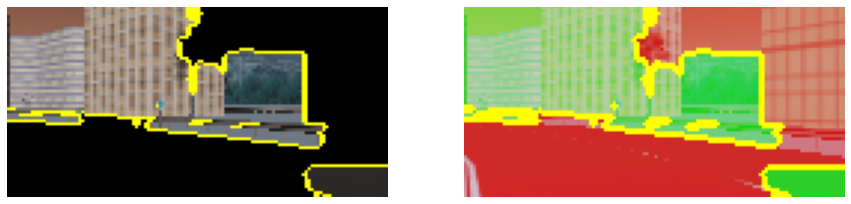

In [16]:
explain_image(4000)

100%|██████████| 1000/1000 [00:01<00:00, 972.19it/s]


[0.9878852  0.00804288 0.00407199]


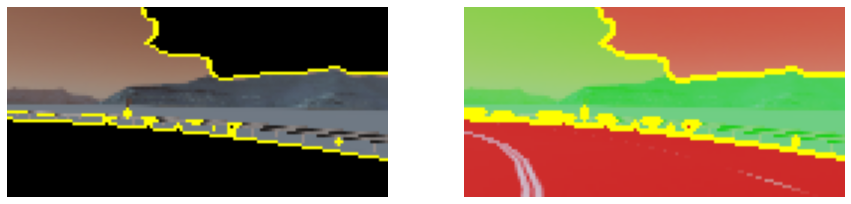

In [17]:
explain_image(5000)

100%|██████████| 1000/1000 [00:01<00:00, 882.40it/s]


[0.16238123 0.51407075 0.32354805]


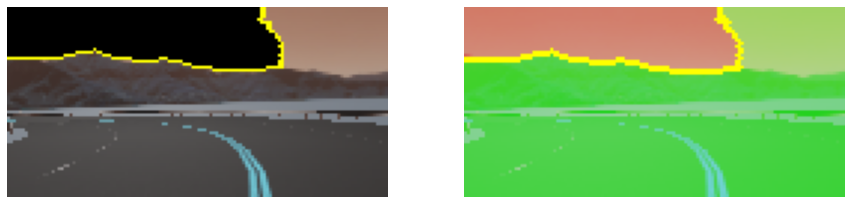

In [18]:
explain_image(6000)